# Nivell 1

### Aquesta tasca consisteix en l'elaboració d'un informe de Power BI, aprofitant les capacitats analítiques de Python. S'utilitzaran els scripts de Python creats prèviament en la Tasca 1 per a generar visualitzacions personalitzades amb les biblioteques Seaborn i Matplotlib. Aquestes visualitzacions seran integrades en l'informe de Power BI per a oferir una comprensió més profunda de la capacitat del llenguatge de programació en l'eina Power BI.

### Exercici 1

Una variable numèrica.

In [1]:
import matplotlib.pyplot as plt

# Assuming 'amount' is a column in your dataset in Power BI
amount_data = dataset['amount']

# Create a histogram plot
plt.hist(amount_data, bins=5, color='skyblue', edgecolor='black')
plt.title('Distribución del amount')
plt.xlabel('Cantidad gastada $')
plt.ylabel('Conteo transacciones')
plt.ylim(0, 150)  # Set y-axis range from 0 to 120
plt.xlim(0, 500)  # Set y-axis range from 0 to 120

# Save the plot as an image file
plt.savefig('histogram.png')

# Close the plot to prevent it from being displayed in the Python script editor
plt.close()


Resultado
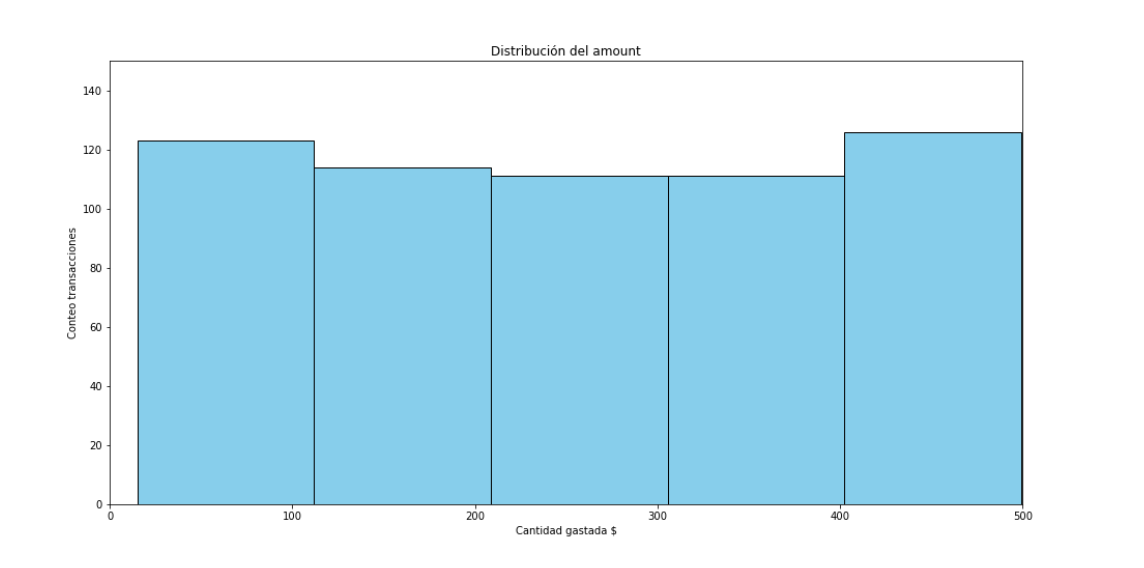

# ----------------------------------------------------------------------------------------------------------

### Exercici 2

Dues variables numèriques.

In [ ]:
import matplotlib.pyplot as plt

price_data = dataset["price"]
age_data = dataset["Age"]

plt.scatter(price_data, age_data, alpha=0.5, s=10)
plt.title('Precio producto por edad del cliente')
plt.xlabel('Precio producto')
plt.ylabel('Edad')
plt.show()

Resultado:
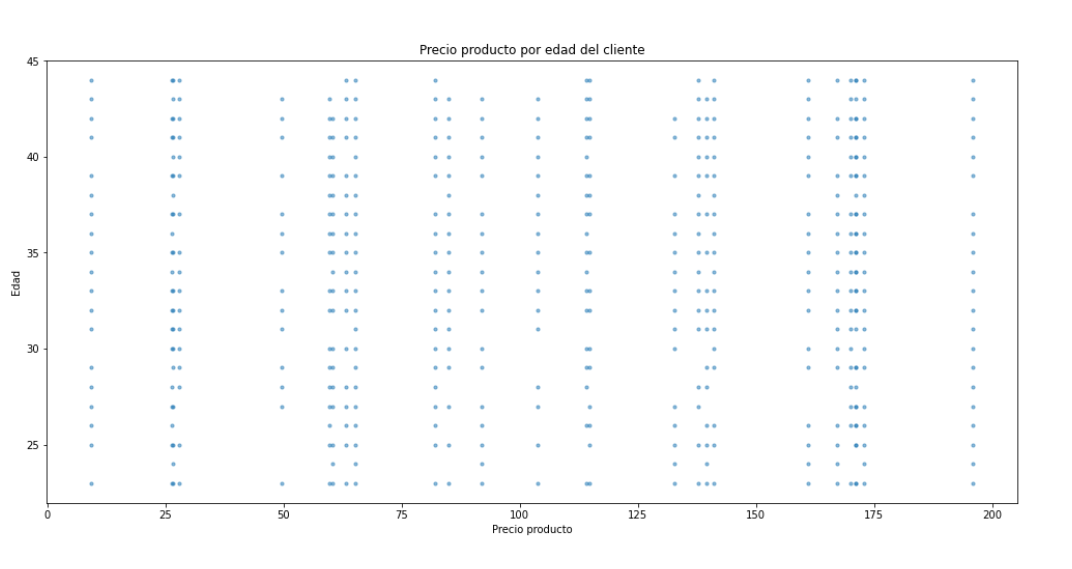

# ------------------------------------------------------------------------------------------------------------

## Exercici 3

Una variable categòrica.

In [ ]:
import matplotlib.pyplot as plt

# Agrupar y sumar el número de usuarios por país
conteo_por_pais = dataset.groupby("country").size()

# Obtener los datos y las etiquetas
datos = conteo_por_pais.values
etiquetas = conteo_por_pais.index
myexplode = [0, 0, 0.1]

# Crear el gráfico circular (pie chart)
plt.pie(datos, labels=etiquetas, autopct='%1.1f%%', shadow=True, explode=myexplode)

# Añadir título
plt.title('Cantidad de usuarios por País')

# Leyenda
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


Resultado:
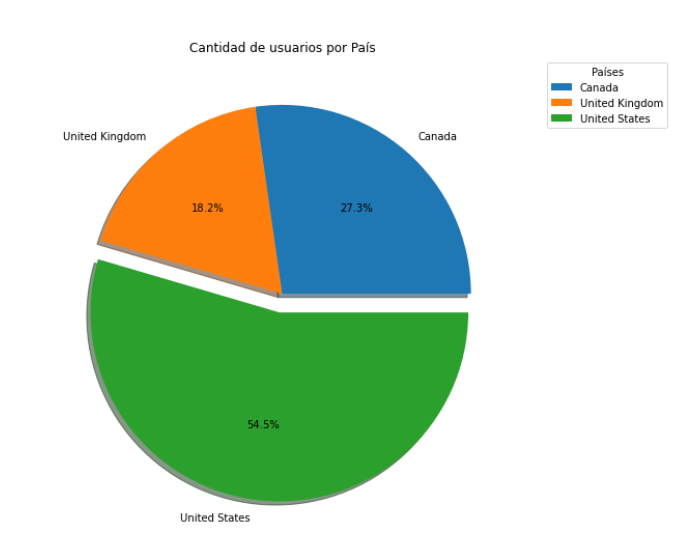

# ---------------------------------------------------------------------------------------------------------

## Exercici 4

Una variable categòrica i una numèrica.

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
pais_data = dataset["country"]
cantidad_data = dataset["amount"]

plt.bar(pais_data, cantidad_data)
plt.title('Cantidad de dinero generado por pais')
plt.ylabel('Dinero $')
plt.xticks(rotation= 45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Resultado:
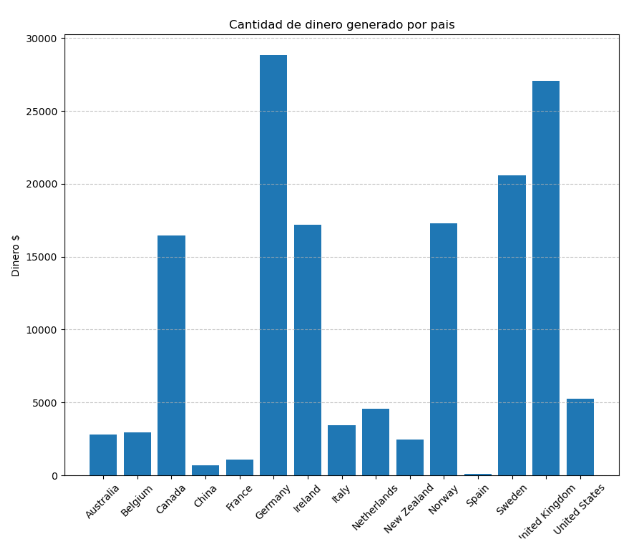

# ---------------------------------------------------------------------------------------------------------

## Exercici 5

Dues variables categòriques.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

declined_data = dataset["declined"]
country_data = dataset["country"]

# Obtener los datos de transacciones aprobadas y no aprobadas por país
approved = dataset.loc[dataset["declined"] == 0].groupby("country").size()
declined = dataset.loc[dataset["declined"] == 1].groupby("country").size()

# Creamos una variable para introducir estos valores en los ticks del X-axis
countries = country_data.unique()

# Con el bar_width configuramos la anchura de las barras
bar_width = 0.35
# Aquí generamos un índice que será necesario para establecer la cantidad de países que introduciremos en el X-axis
index = np.arange(len(countries))

# Aquí generaremos la barra azul del gráfico, la cual veremos la cantidad de aprobados
plt.bar(index, approved, bar_width, label='Aprobadas')

# Aquí generamos prácticamente lo mismo, la diferencia es que añadimos el index sumándole el bar_widht
# Esto nos generará la siguiente barra a la derecha
# En vez de usar approved, aquí sumaremos los declined
plt.bar(index + bar_width, declined, bar_width, label='No Aprobadas')

# Personalizar el gráfico
plt.title('Transacciones Aprobadas vs No Aprobadas por País')
plt.xlabel('País')
plt.ylabel('Número de Transacciones')
plt.ylim(0,100)

# Aquí el index + bardwith /2, como lo estamos ejecutando en los ticks del X-axis
# Lo que hace es ajustar donde queremos que aparezca el tick
# En este caso, al dividirlo /2, lo que hace es dejar el nombre del país justo en el medio para que quede centrado
plt.xticks(index + bar_width / 2, countries, rotation=90)
plt.legend()
# El tight_layout veo que hace ver la gráfica más estirada, dando mejor visualización en este caso
plt.tight_layout()

# Mostrar el gráfico
plt.show()


resultado:
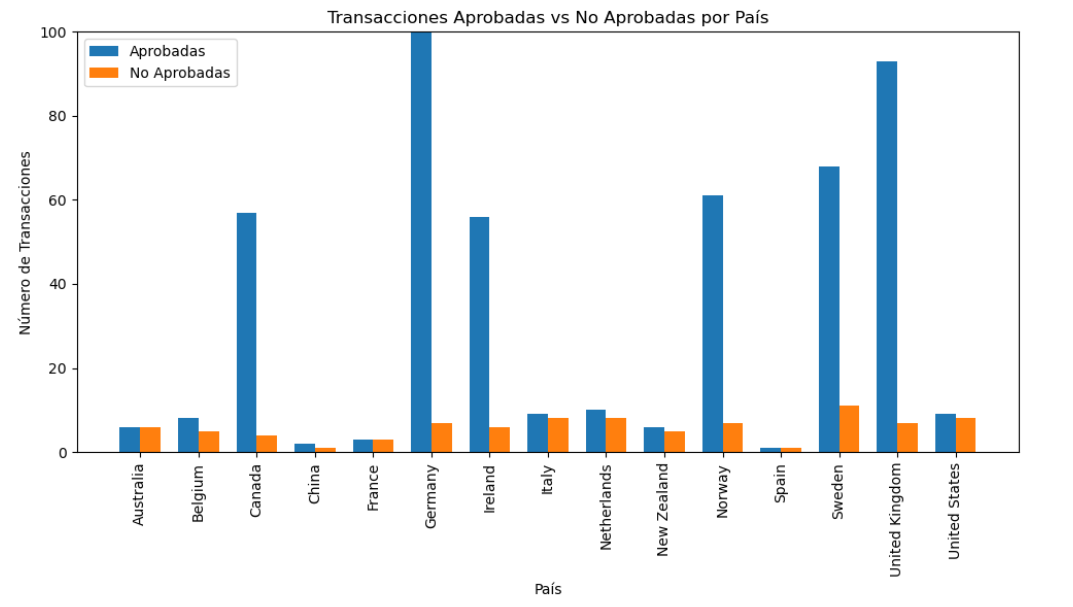

# -------------------------------------------------------------------------------------------------------

## - Exercici 6

Tres variables.

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (8,4))

año_data = dataset["Año"]
country_data = dataset["country"]

df_2021 = año_data == 2021
df_2022 = año_data == 2022
amount_año_2021 = dataset.loc[dataset["Año"] == 2021].groupby("country")["amount"].sum()
amount_año_2022 = dataset.loc[dataset["Año"] == 2022].groupby("country")["amount"].sum()
countries = country_data.unique()
amount_año_2021 = amount_año_2021.reindex(countries).fillna(0)
amount_año_2022 = amount_año_2022.reindex(countries).fillna(0)
countries = country_data.unique()
#Con el bar_width configuramos la anchura de las barras
bar_width = 0.35
#Aqui generamos un indice, que sera necesario para establecer la cantidad de paises que introduciremos en el X-axis
index = np.arange(len(countries))

plt.bar(index, amount_año_2021, bar_width, label='Suma_2021')

#Aqui generamos practicamente lo mismo, la diferencia es que añadimos el index sumandole el bar_widht(esto es lo que nos hace es
#generar la siguiente barra a la derecha, en vez de usar approved, aqui sumaremos los declined, y añadirle el label)
plt.bar(index + bar_width, amount_año_2022, bar_width, label='Suma_2022')

# Personalizar el gráfico
plt.title('Cantidad amount por año y por país')
plt.xlabel('País')
plt.ylabel('Dinero $')

#Aqui el index + bardwith /2, como lo estamos ejecutando en los ticks del X-axis, lo que hace es ajustar donde queremos que
#aparezca el tick, en este caso al dividirlo /2, lo que hace es dejar el nombre del país, justo en el medio para que quede
#centrado
plt.xticks(index + bar_width / 2, countries, rotation=90)
plt.legend()
#El tight_layout veo que hace verse la gráfica más estirada, dando mejor visualización en este caso
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Resultado:
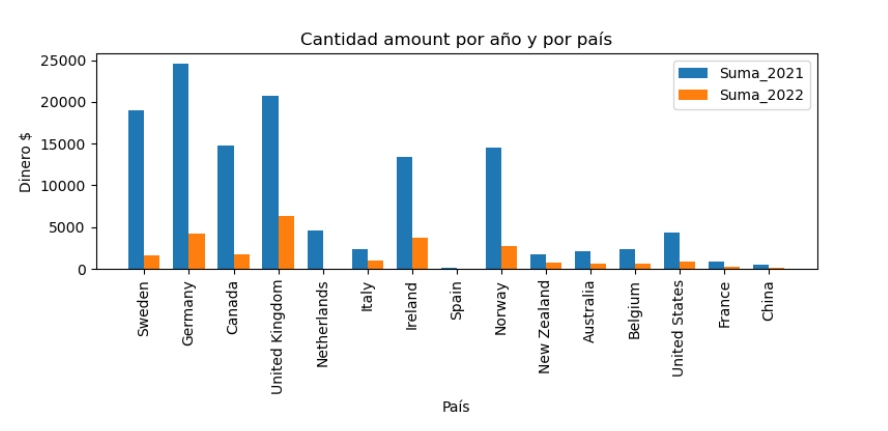

# ----------------------------------------------------------------------------------------------------

## - Exercici 7

Graficar un Pairplot.

In [ ]:
df = pd.DataFrame({
    "declined": dataset["declined"],
    "price": dataset["price"],
    "weight": dataset["weight"]
})

# Crear el pairplot
sns.pairplot(df, diag_kind="kde", kind="reg", height=2, aspect=1)
plt.show()


Resultado:
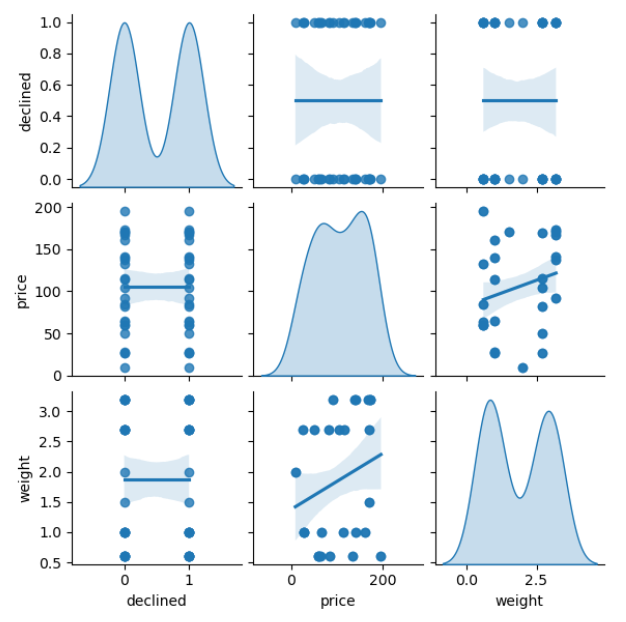

# -----------------------------------------------------------------------------------------------------


## Nivell 2
Exercici 1

Correlació de totes les variables numèriques.

In [ ]:
df = pd.DataFrame({
    "declined": dataset["declined"],
    "price": dataset["price"],
    "weight": dataset["weight"],
    "amount": dataset["amount"]
})

correlation = df.corr()

# Genera un mapa de calor con la matriz de correlación
plt.figure(figsize=(8, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlación de variables numéricas')
plt.show()

Resultado:
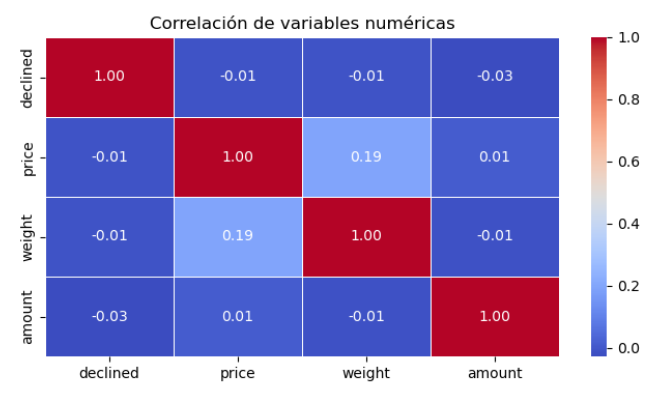


# -----------------------------------------------------------------------------------------------------

## Exercici 2

Implementa un jointplot.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame({"weight": dataset["weight"],
                    "amount": dataset["amount"]})

plt.figure(figsize = (8,6))
sns.jointplot(data = df,
              x = "weight",
              y = "amount")
plt.show()

resultado:
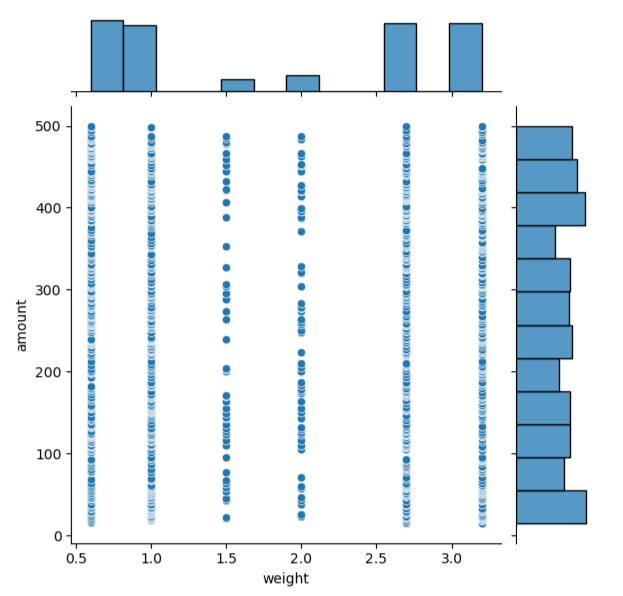

# -------------------------------------------------------------------------------------------------------------

# NIVELL 3

## Exercici 1

Implementa un violinplot combinat amb un altre tipus de gràfic.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame({"country": dataset["country"],
                    "amount": dataset["amount"]})
sns.set(style = 'whitegrid') 

 
# loading data-set
plt.figure(figsize=(10,8))
 
sns.violinplot(x ='country', y ='amount',
                   data = df,
                   inner="points",
                  cut = 0)
plt.xticks(rotation=45)

plt.show();

Resultado:
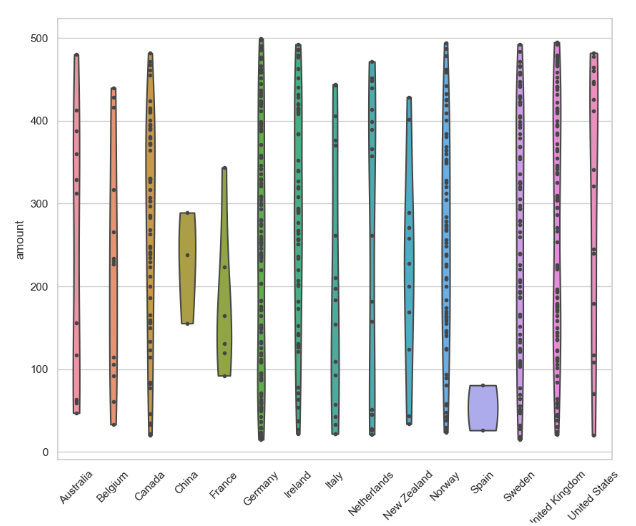

# -----------------------------------------------------------------------------------------------

## Exercici 2

Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({"price": dataset["price"],
                    "colour": dataset["colour"],
                    "weight": dataset["weight"],
                    "country": dataset["country"],
                    "declined": dataset["declined"]})


# Definir una función lambda para asignar etiquetas de peso
def assign_weight_label(weight):
    if weight > 1.9:
        return "heavy weight"
    else:
        return "light weight"

# Aplicar la función lambda a la columna 'weight' para crear la nueva columna 'weight_label'
df['weight_label'] = df['weight'].apply(lambda x: assign_weight_label(x))

df['declined_label'] = df['declined'].map({0: 'No', 1: 'Sí'})

g = sns.FacetGrid(df, col="declined_label")
g.map_dataframe(sns.scatterplot, x="price", y="country", hue="weight_label")
g.add_legend()
plt.show();

Resultado:
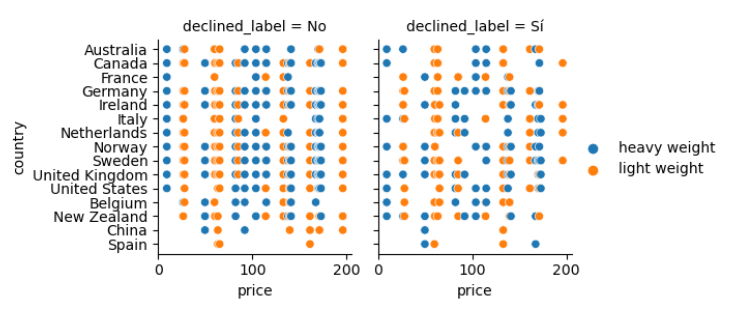